# QSVM Example

Code shamelessly stolen from https://qiskit.org/documentation/machine-learning/tutorials/03_quantum_kernel.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

import pandas as pd

seed = 12345
algorithm_globals.random_seed = seed

## Using AdHoc

In [2]:
df = pd.read_csv('datasets/adhoc.csv', index_col=[0])
df.head()

,feature_1,feature_2,label
0,0.251327,0.125664,0.0
1,2.953097,2.450442,0.0
2,1.947787,5.403539,0.0
3,1.696460,2.199115,0.0
4,1.696460,4.084070,0.0


In [3]:
adhoc_dimension = 2 #the same one as in datasets.ipynb

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

In [4]:
features = df.loc[:, ['feature_1', 'feature_2']].values
labels = df.loc[:, 'label'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=seed)

In [6]:
#with 500 datapoints it will take roughly 40 minutes to compute
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(X_train, y_train)
adhoc_score = adhoc_svc.score(X_test, y_test)

print(f"Callable kernel classification test score: {adhoc_score}")

Callable kernel classification test score: 1.0


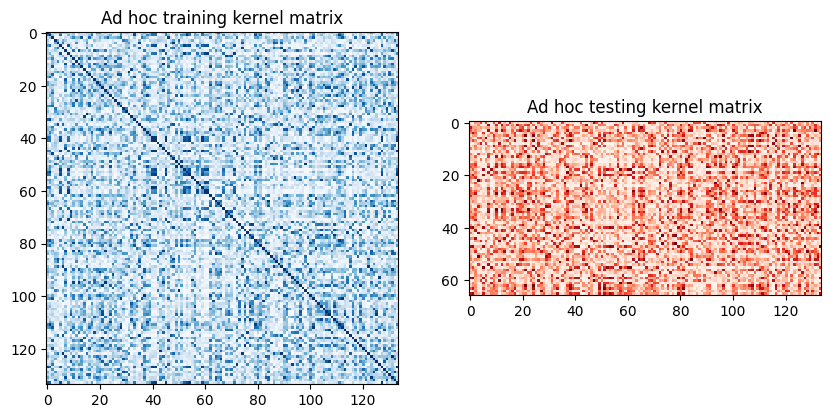

Precomputed kernel classification test score: 1.0


In [7]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=X_train)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=X_test, y_vec=X_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")
plt.show()

adhoc_svc = SVC(kernel="precomputed")
adhoc_svc.fit(adhoc_matrix_train, y_train)
adhoc_score = adhoc_svc.score(adhoc_matrix_test, y_test)

print(f"Precomputed kernel classification test score: {adhoc_score}")

## Using Iris

_The multiclass support is handled according to a one-vs-one scheme._ 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
df = pd.read_csv('datasets/iris.csv', index_col=[0])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
adhoc_dimension = 2 #the same one as in datasets.ipynb

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

In [10]:
features = df.iloc[:, 0:4].values
labels = df.loc[:, 'label'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=seed)

In [12]:
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(X_train, y_train)
adhoc_score = adhoc_svc.score(X_test, y_test)

print(f"Callable kernel classification test score: {adhoc_score}")

Callable kernel classification test score: 0.9


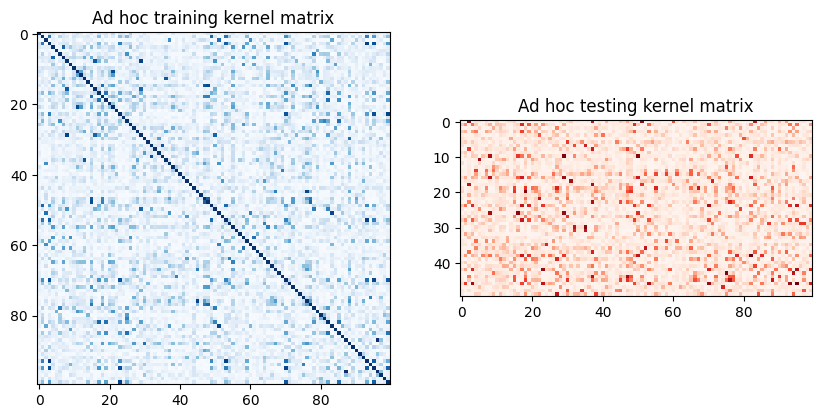

Precomputed kernel classification test score: 0.9


In [13]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=X_train)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=X_test, y_vec=X_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")
plt.show()

adhoc_svc = SVC(kernel="precomputed")
adhoc_svc.fit(adhoc_matrix_train, y_train)
adhoc_score = adhoc_svc.score(adhoc_matrix_test, y_test)

print(f"Precomputed kernel classification test score: {adhoc_score}")